In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

### Распределение Парето
wiki link: https://en.wikipedia.org/wiki/Pareto_distribution

Среднее: $$ E[x]={x(m)k}/{k−1} $$, где x(m - минимальное значение (в scipy.pareto по умолчанию x(m)=1), а k -> это параметр b - "коэффициент кривизны")

Дисперсия: $$ D[x]=(x(m)k / k−1)^2 * (k/k−2)= E[x]^2 *(k / k−2) $$ , при k > 2. В расчетах используем k = 3 чтобы иметь возможность определить дисперсию.

In [3]:
#найдем среднее и дисперсию
xm=1.#минимальное значение
k=3.
E=(xm*k)/(k-1)#среднее(мат ожидание)
D=(E**2)*(k/(k-2))#дисперсия
print (E)
print (D)

1.5
6.75


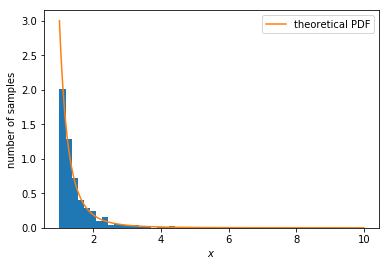

In [4]:
#генерируем выборку объема 1000
pareto = sts.pareto(b=3)
sam = pareto.rvs(size=1000)
x = np.linspace(1,10,1000)#определяем массив точек для построения плотности распределения
pdf = pareto.pdf(x)#плотность распределения от выборки

#строим гистрограмму выборки и теоретическую функцию распределения
plt.hist(sam,bins = 50, range=(1,10), normed=True)
plt.ylabel('number of samples')
plt.xlabel('$x$')
plt.plot(x, pdf, label='theoretical PDF')
plt.legend(loc='upper right')

## при n = 5

In [5]:
import math

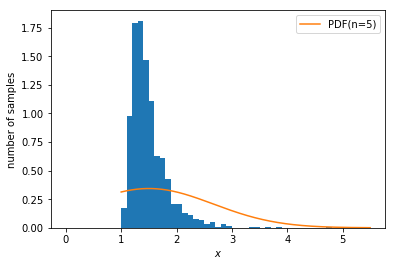

In [11]:
n=5
sam5=np.array([])#обозначим массив выборочных средних
i=1
while i <= 1000:#цикл генерации случайных выборок количества n из функции
    sam5i = pareto.rvs(n)#генерация выборки
    mean5i=sum(sam5i)/n#определение выборочного среднего
    sam5=np.append(sam5,mean5i)#добавляем в массив новое значение
    i+=1
    
#найдем параметры нормального распределения описывающие массив 1000 при n=5
E=1.5 #среднее
D=6.75 #дисперсия
D5=D/n #дисперсия для нормального распределения приближающего выборку средних
sigma5=math.sqrt(D5)#сигма для нормального распределения выборки средних
norm5 = sts.norm(E, sigma5)#определяем нормальное распределение с расчетными характеристиками Парето
pdf5 = norm5.pdf(x[:500])#получаем плотность распределения

#строим гистограмму массива средних при n=5 и плотность описывающую этот массив нормального распределения
plt.hist(sam5, bins =50, range=(0,5), normed=True)
plt.plot(x[:500], pdf5, label='PDF(n=5)')
plt.ylabel('number of samples')
plt.xlabel('$x$')
plt.legend(loc='upper right')

## при n = 20

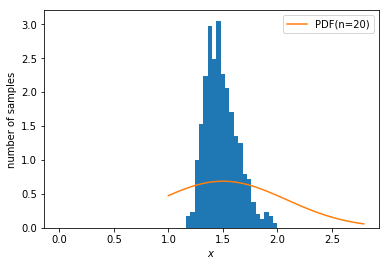

In [12]:
n=20
sam20=np.array([])#обозначим массив выборочных средних
i=1
while i <= 1000:#цикл генерации случайных выборок количества n из функции
    sam20i = pareto.rvs(n)#генерация выборки
    mean20i=sum(sam20i)/n#определение выборочного среднего
    sam20=np.append(sam20,mean20i)#добавляем в массив новое значение 
    i+=1
#найдем параметры нормального распределения описывающие массив 1000 при n=20
E=1.5 #среднее 
D=6.75 #дисперсия 
D20=D/n #дисперсия для нормального распределения приближающего выборку средних
sigma20=math.sqrt(D20)#сигма для нормального распределения выборки средних
norm20 = sts.norm(E, sigma20)#определяем нормальное распределение с расчетными характеристиками Парето
pdf20 = norm20.pdf(x[:200])#получаем плотность распределения

#строим гистограмму массива средних при n=20 и плотность описывающую этот массив нормального распределения
plt.hist(sam20, bins =50, range=(0,2), normed=True)
plt.plot(x[:200], pdf20, label='PDF(n=20)')
plt.ylabel('number of samples')
plt.xlabel('$x$')
plt.legend(loc='upper right')

## при n = 80

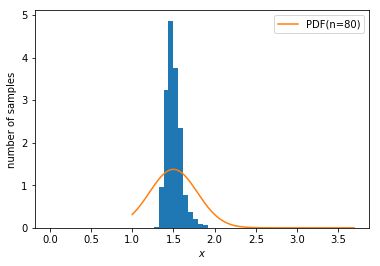

In [13]:
n=80
sam80=np.array([])#обозначим массив выборочных средних
i=1
while i <= 1000:#цикл генерации случайных выборок количества n из функции
    sam80i = pareto.rvs(n)#генерация выборки
    mean80i=sum(sam80i)/n #определение выборочного среднего
    sam80=np.append(sam80,mean80i)#добавляем в массив новое значение
    i+=1
#определим параметры нормального распределения описывающие массив 1000 при n=80
E=1.5 #среднее
D=6.75 #дисперсия
D80=D/n#дисперсия для нормального распределения выборки средних
sigma80=math.sqrt(D80)#сигма для нормального распределения выборки средних
norm80 = sts.norm(E, sigma80)#определяем нормальное распределение с расчетными характеристиками Парето
pdf80 = norm80.pdf(x[:300])#получаем плотность распределения

#строим гистограмму массива средних при n=80 и плотность описывающую этот массив нормального распределения
plt.hist(sam80, bins =50, range=(0,3), normed=True)
plt.plot(x[:300], pdf80, label='PDF(n=80)')
plt.ylabel('number of samples')
plt.xlabel('$x$')
plt.legend(loc='upper right')

Вывод: Распределение выборочных средених при увеличении n становится все более похожим на нормальное. С ростом n точность аппроксимация распределения выборочных средних нормальным улучшается.